In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set_palette('magma')
sns.set_theme(style='darkgrid', rc={"figure.figsize": (15, 4)})

In [4]:
from tqdm import tqdm

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
from scipy import sparse

In [8]:
import scipy.stats as stats

In [9]:
from sklearn.metrics import mean_absolute_error

# Первичный анализ

In [10]:
green_tripdata_2019_df = pd.read_csv('data/December_2019/green_tripdata_2019-12.csv')
yellow_tripdata_2019_df = pd.read_csv('data/December_2019/yellow_tripdata_2019-12.csv')

green_tripdata_2020_df = pd.read_csv('data/January_2020/green_tripdata_2020-01.csv')
yellow_tripdata_2020_df = pd.read_csv('data/January_2020/yellow_tripdata_2020-01.csv')

In [11]:
green_tripdata_2020_df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2019-12-18 15:52:30,2019-12-18 15:54:39,N,1.0,264,264,5.0,0.00,3.5,0.50,0.5,0.01,0.0,NaN,0.3,4.81,1.0,1.0,0.00
1,2.0,2020-01-01 00:45:58,2020-01-01 00:56:39,N,5.0,66,65,2.0,1.28,20.0,0.00,0.0,4.06,0.0,NaN,0.3,24.36,1.0,2.0,0.00
2,2.0,2020-01-01 00:41:38,2020-01-01 00:52:49,N,1.0,181,228,1.0,2.47,10.5,0.50,0.5,3.54,0.0,NaN,0.3,15.34,1.0,1.0,0.00
3,1.0,2020-01-01 00:52:46,2020-01-01 01:14:21,N,1.0,129,263,2.0,6.30,21.0,3.25,0.5,0.00,0.0,NaN,0.3,25.05,2.0,1.0,2.75
4,1.0,2020-01-01 00:19:57,2020-01-01 00:30:56,N,1.0,210,150,1.0,2.30,10.0,0.50,0.5,0.00,0.0,NaN,0.3,11.30,1.0,1.0,0.00


In [12]:
green_tripdata_2020_df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2019-12-18 15:52:30,2019-12-18 15:54:39,N,1.0,264,264,5.0,0.00,3.5,0.50,0.5,0.01,0.0,NaN,0.3,4.81,1.0,1.0,0.00
1,2.0,2020-01-01 00:45:58,2020-01-01 00:56:39,N,5.0,66,65,2.0,1.28,20.0,0.00,0.0,4.06,0.0,NaN,0.3,24.36,1.0,2.0,0.00
2,2.0,2020-01-01 00:41:38,2020-01-01 00:52:49,N,1.0,181,228,1.0,2.47,10.5,0.50,0.5,3.54,0.0,NaN,0.3,15.34,1.0,1.0,0.00
3,1.0,2020-01-01 00:52:46,2020-01-01 01:14:21,N,1.0,129,263,2.0,6.30,21.0,3.25,0.5,0.00,0.0,NaN,0.3,25.05,2.0,1.0,2.75
4,1.0,2020-01-01 00:19:57,2020-01-01 00:30:56,N,1.0,210,150,1.0,2.30,10.0,0.50,0.5,0.00,0.0,NaN,0.3,11.30,1.0,1.0,0.00


In [13]:
yellow_tripdata_2019_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.2,1.0,N,142,116,2.0,14.5,3.0,0.5,0.0,0.0,0.3,18.3,2.5
1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.4,1.0,N,138,25,1.0,28.5,0.5,0.5,10.0,0.0,0.3,39.8,0.0
4,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.6,1.0,N,161,237,2.0,9.0,3.0,0.5,0.0,0.0,0.3,12.8,2.5


In [14]:
yellow_tripdata_2020_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [15]:
green_tripdata_2020_df.shape, yellow_tripdata_2020_df.shape

((447770, 20), (6405008, 18))

In [16]:
np.setdiff1d(green_tripdata_2019_df.columns, green_tripdata_2020_df.columns),\
np.setdiff1d(yellow_tripdata_2019_df.columns, yellow_tripdata_2020_df.columns)

(array([], dtype=object), array([], dtype=object))

Признаки за 2019 и 2020 года в желтых и зеленых такси не различаются. Смержим их

In [17]:
green_tripdata_df = pd.concat([green_tripdata_2019_df, green_tripdata_2020_df], axis=0).reset_index(drop=True)
yellow_tripdata_df = pd.concat([yellow_tripdata_2019_df, yellow_tripdata_2020_df], axis=0).reset_index(drop=True)

In [18]:
green_tripdata_df.shape, yellow_tripdata_df.shape

((898397, 20), (13301325, 18))

In [19]:
np.setdiff1d(green_tripdata_df.columns, yellow_tripdata_df.columns)

array(['ehail_fee', 'lpep_dropoff_datetime', 'lpep_pickup_datetime',
       'trip_type'], dtype=object)

Видим, что количество признаков в таблицах различается на 2 (lpep... и tpep... один и тот же признак):
 - ehail_fee - непонятно, что такое (не описано в https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf)
 - trip_type - 1/2 - Street-hail/Dispatch

In [20]:
# видим, что признак ehail_fee - везде NaN. Поэтому выкинем его
green_tripdata_df.ehail_fee.isnull().sum(), green_tripdata_df.shape[0]

(898397, 898397)

In [21]:
green_tripdata_df.drop('ehail_fee',axis=1, inplace=True)

Смержим зеленые и желтые такси в одну таблицу:
 - создадим новый признак taxi_type={0,1}, где
     - 0 - зеленое такси
     - 1 - желтое такси
 - заменим tpep... и lpep... на pep
 - поскольку для желтых такси нет информации про trip_type, создадим для них признак trip_type со значениями 1,
   поскольку "традиционно" (источник: https://www1.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf) желтые такси вызывают на улице (Street-hail) 

In [22]:
yellow_tripdata_df['taxi_type'] = 1
green_tripdata_df['taxi_type'] = 0
yellow_tripdata_df.rename(columns={'tpep_pickup_datetime': 'pickup_datetime',
                                  'tpep_dropoff_datetime': 'dropoff_datetime'}, inplace=True)

green_tripdata_df.rename(columns={'lpep_pickup_datetime': 'pickup_datetime',
                                  'lpep_dropoff_datetime': 'dropoff_datetime'}, inplace=True)

yellow_tripdata_df['trip_type'] = 1

In [23]:
# убедимся, что все признаки совпадают
np.setdiff1d(green_tripdata_df.columns, yellow_tripdata_df.columns)

array([], dtype=object)

In [24]:
tripdata_df = pd.concat([yellow_tripdata_df, green_tripdata_df], axis=0)

In [25]:
tripdata_df.shape

(14199722, 20)

In [26]:
tripdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14199722 entries, 0 to 898396
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   pickup_datetime        object 
 2   dropoff_datetime       object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  taxi_type              int64  
 19  trip_type              float64
dtypes: float64(14), int64(3), object(3)
memory usage: 2.2+ GB


Приведем признаки pickup_datetime и dropoff_datetime к типу timeseries.

In [27]:
tripdata_df['pickup_datetime'] = pd.to_datetime(tripdata_df['pickup_datetime'])
tripdata_df['dropoff_datetime'] = pd.to_datetime(tripdata_df['dropoff_datetime'])

In [28]:
tripdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14199722 entries, 0 to 898396
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   pickup_datetime        datetime64[ns]
 2   dropoff_datetime       datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  taxi_type             

# 1) Как стоимость поездки скоррелирована с другими факторами? Как вы это можете объяснить?

Под стоимостью поездки будем понимать значения признака total_amount - общая сумма поездки за исключением наличных чаевых (cash tips)

Выделим следующие факторы из предоставленных данных, которые могут иметь смысл:
- VendorID
- pickup_date - конкретный день (без времени)
- pickup_year
- pickup_month
- pickup_dayofweek
- pickup_hour - в который час пассажир сел в машину
- dropoff_date - конкретный день (без времени)
- dropoff_year
- dropoff_month
- dropoff_dayofweek
- dropoff_hour - в который час пассажир вышел из машины
- trip_time - время поездки в секундах. Получается из dropoff_datetime.dt.time - pickup_datetime.dt.time
- passenger_count
- trip_distance
- RatecodeID
- store_and_fwd_flag
- PULocationID
- DOLocationID
- way - путь из PULocationID в DOLocationID. Получается путем склеивания PULocationID с DOLocationID разделителем '_'
- payment_type
- fare_amount
- extra
- mta_tax
- tip_amount
- tolls_amount
- improvement_surcharge
- congestion_surcharge
- taxi_type
- trip_type

In [29]:
picked_features_df = tripdata_df[['VendorID','passenger_count','trip_distance','RatecodeID',
                                         'store_and_fwd_flag','PULocationID','DOLocationID','payment_type',
                                        'fare_amount','extra','mta_tax','tip_amount','tolls_amount',
                                         'improvement_surcharge','congestion_surcharge','taxi_type','trip_type',
                                 'total_amount']]

In [30]:
picked_features_df['pickup_date'] = tripdata_df['pickup_datetime'].dt.date
picked_features_df['dropoff_date'] = tripdata_df['dropoff_datetime'].dt.date

In [31]:
picked_features_df['pickup_year'] = tripdata_df['pickup_datetime'].dt.year
picked_features_df['dropoff_year'] = tripdata_df['dropoff_datetime'].dt.year

picked_features_df['pickup_month'] = tripdata_df['pickup_datetime'].dt.month
picked_features_df['dropoff_month'] = tripdata_df['dropoff_datetime'].dt.month

picked_features_df['pickup_dayofweek'] = tripdata_df['pickup_datetime'].dt.dayofweek
picked_features_df['dropoff_dayofweek'] = tripdata_df['dropoff_datetime'].dt.dayofweek

picked_features_df['pickup_hour'] = tripdata_df['pickup_datetime'].dt.hour
picked_features_df['dropoff_hour'] = tripdata_df['dropoff_datetime'].dt.hour

In [32]:
picked_features_df['trip_time'] = (tripdata_df['dropoff_datetime'] -\
                                   tripdata_df['pickup_datetime']).dt.total_seconds()

In [33]:
picked_features_df['way'] = tripdata_df['PULocationID'].astype(str) + '_' + tripdata_df['DOLocationID'].astype(str)

In [34]:
picked_features_df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,pickup_year,dropoff_year,pickup_month,dropoff_month,pickup_dayofweek,dropoff_dayofweek,pickup_hour,dropoff_hour,trip_time,way
0,1.0,1.0,4.2,1.0,N,142,116,2.0,14.5,3.0,...,2019,2019,12,12,6,6,0,0,887.0,142_116
1,1.0,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,...,2019,2019,12,12,6,6,0,0,6.0,145_145
2,1.0,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,...,2019,2019,12,12,6,6,0,0,11.0,145_145
3,1.0,2.0,9.4,1.0,N,138,25,1.0,28.5,0.5,...,2019,2019,12,12,6,6,0,0,1276.0,138_25
4,1.0,2.0,1.6,1.0,N,161,237,2.0,9.0,3.0,...,2019,2019,12,12,6,6,0,0,665.0,161_237


In [35]:
# посмотрим на пропущенные значения
picked_features_df.isnull().sum()

VendorID                 323235
passenger_count          323235
trip_distance                 0
RatecodeID               323235
store_and_fwd_flag       323235
PULocationID                  0
DOLocationID                  0
payment_type             323235
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         2
congestion_surcharge     206778
taxi_type                     0
trip_type                206779
total_amount                  0
pickup_date                   0
dropoff_date                  0
pickup_year                   0
dropoff_year                  0
pickup_month                  0
dropoff_month                 0
pickup_dayofweek              0
dropoff_dayofweek             0
pickup_hour                   0
dropoff_hour                  0
trip_time                     0
way                           0
dtype: int64

Заменим пропущенные значения категориальных признаков (VendorID, RatecodeID, store_and_fwd_flag, payment_type, trip_type) на наиболее часто встречаемое значение (mode), количественных (improvement_surcharge, congestion_surcharge) средним значением (mean),
порядковых (passenger_count) медианой (median)

In [36]:
picked_features_df['VendorID'].fillna(picked_features_df['VendorID'].mode()[0], inplace=True)
picked_features_df['RatecodeID'].fillna(picked_features_df['RatecodeID'].mode()[0], inplace=True)
picked_features_df['store_and_fwd_flag'].fillna(picked_features_df['store_and_fwd_flag'].mode()[0], inplace=True)
picked_features_df['payment_type'].fillna(picked_features_df['payment_type'].mode()[0], inplace=True)
picked_features_df['trip_type'].fillna(picked_features_df['trip_type'].mode()[0], inplace=True)

picked_features_df['improvement_surcharge'].fillna(picked_features_df['improvement_surcharge'].mean(), inplace=True)
picked_features_df['congestion_surcharge'].fillna(picked_features_df['congestion_surcharge'].mean(), inplace=True)

picked_features_df['passenger_count'].fillna(picked_features_df['passenger_count'].median(), inplace=True)

In [37]:
picked_features_df.isnull().sum()

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
congestion_surcharge     0
taxi_type                0
trip_type                0
total_amount             0
pickup_date              0
dropoff_date             0
pickup_year              0
dropoff_year             0
pickup_month             0
dropoff_month            0
pickup_dayofweek         0
dropoff_dayofweek        0
pickup_hour              0
dropoff_hour             0
trip_time                0
way                      0
dtype: int64

Посмотрим, соответсвуют ли значения таких категориальных признаков как VendorID, RatecodeID,payment_type,trip_type,store_and_fwd_flag описанию (https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

In [38]:
categorical_features = ['VendorID', 'RatecodeID', 'payment_type','trip_type','store_and_fwd_flag']

In [39]:
for feature in categorical_features:
    print('{}: {}'.format(feature, picked_features_df[feature].unique()))

VendorID: [1. 2.]
RatecodeID: [ 1.  2.  5.  4.  3. 99.  6.]
payment_type: [2. 1. 3. 4. 5.]
trip_type: [1. 2.]
store_and_fwd_flag: ['N' 'Y']


Видим, что RateCodeID имеет непонятное значение 99, поэтому будем считать его NaN и заменим как и ранее модой

In [40]:
picked_features_df.loc[picked_features_df[picked_features_df['RatecodeID'] == 99].index,'RatecodeID'] =\
picked_features_df['RatecodeID'].mode()[0]

In [41]:
picked_features_df['RatecodeID'].unique()

array([1., 2., 5., 4., 3., 6.])

Заметим, что данные встречаются не только за декабрь 2019 года или январь 2020

In [42]:
picked_features_df[~(((picked_features_df['pickup_year'] == 2019) & (picked_features_df['pickup_month'] == 12) &\
                  (picked_features_df['dropoff_year'] == 2019) & (picked_features_df['dropoff_month'] == 12)) |\
                    ((picked_features_df['pickup_year'] == 2020) & (picked_features_df['pickup_month'] == 1) &\
                  (picked_features_df['dropoff_year'] == 2020) & (picked_features_df['dropoff_month'] == 1)))]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,pickup_year,dropoff_year,pickup_month,dropoff_month,pickup_dayofweek,dropoff_dayofweek,pickup_hour,dropoff_hour,trip_time,way
11,2.0,1.0,2.12,1.0,N,234,230,2.0,12.00,0.50,...,2019,2019,11,12,5,6,23,0,912.0,234_230
243,2.0,1.0,1.57,1.0,N,162,236,1.0,6.50,0.50,...,2019,2019,11,12,5,6,23,0,301.0,162_236
247,2.0,1.0,1.37,1.0,N,127,243,2.0,6.50,0.50,...,2019,2019,11,12,5,6,23,0,394.0,127_243
517,2.0,1.0,3.30,1.0,N,144,162,2.0,13.50,0.50,...,2019,2019,11,12,5,6,23,0,1006.0,144_162
559,2.0,1.0,0.71,1.0,N,231,13,2.0,5.00,0.50,...,2019,2019,11,12,5,6,23,0,260.0,231_13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898388,2.0,1.0,9.77,1.0,N,21,222,1.0,32.96,2.75,...,2020,2020,1,2,4,5,23,0,1260.0,21_222
898393,2.0,1.0,6.55,1.0,N,81,69,1.0,27.27,2.75,...,2020,2020,1,2,4,5,23,0,1560.0,81_69
898394,2.0,1.0,3.34,1.0,N,244,241,1.0,25.95,2.75,...,2020,2020,1,2,4,5,23,0,780.0,244_241
898395,2.0,1.0,8.92,1.0,N,68,17,1.0,30.39,2.75,...,2020,2020,1,2,4,5,23,0,2220.0,68_17


Удалим их

In [43]:
picked_features_df = picked_features_df[(\
                    (picked_features_df['pickup_year'] == 2019) & (picked_features_df['pickup_month'] == 12) &\
                  (picked_features_df['dropoff_year'] == 2019) & (picked_features_df['dropoff_month'] == 12)) |\
                    ((picked_features_df['pickup_year'] == 2020) & (picked_features_df['pickup_month'] == 1) &\
                  (picked_features_df['dropoff_year'] == 2020) & (picked_features_df['dropoff_month'] == 1))]

Чтобы оценить взаимосвязь выделенных факторов с целевой переменной обучим линейную регрессию и посмотрим на ее коэффициенты

Для этого необходимо кодировать категориальные признаки (VendorID, RatecodeID, PULocationID,
DOLocationID, payment_type, way, pickup_date, dropoff_date, store_and_fwd_flag, taxi_type) OneHot кодированием, чтоб они имели смысл для линейной регрессии.

In [44]:
data_for_linear_reg = picked_features_df.reset_index(drop=True)

In [45]:
encoder = OneHotEncoder()
ohe_encode_columns = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'way',
                      'pickup_date', 'dropoff_date','trip_type','store_and_fwd_flag','taxi_type']
ohe_encode_features_sparse = encoder.fit_transform(picked_features_df[ohe_encode_columns])

In [46]:
# заводим список названий oheencoder признаков
ohe_encode_columns_sparse = []
for column in ohe_encode_columns:
    ohe_encode_columns_sparse.extend([column + '=' + str(i) for i in picked_features_df[column].unique()])

In [47]:
data_for_linear_reg.drop(ohe_encode_columns, axis=1, inplace=True)

In [48]:
sparse_learn_data = sparse.hstack([ohe_encode_features_sparse,\
                                   data_for_linear_reg.drop('total_amount',axis=1).to_numpy()]).tocsr()

In [49]:
%%time
log_model = LinearRegression()
log_model.fit(sparse_learn_data,\
              data_for_linear_reg['total_amount'])

CPU times: user 41min 25s, sys: 6min 7s, total: 47min 32s
Wall time: 27min 23s


LinearRegression()

In [50]:
coef_df = pd.DataFrame(log_model.coef_, index=np.hstack([ohe_encode_columns_sparse,\
                                                         data_for_linear_reg.drop('total_amount',axis=1).columns]),\
                       columns=['coef']).sort_values(by='coef', ascending=False)
                       
coef_df.head()

,coef
improvement_surcharge,2.664869
mta_tax,2.022696
way=152_78,1.611669
way=155_127,1.408474
way=124_171,1.367896


In [51]:
coef_df.shape

(44451, 1)

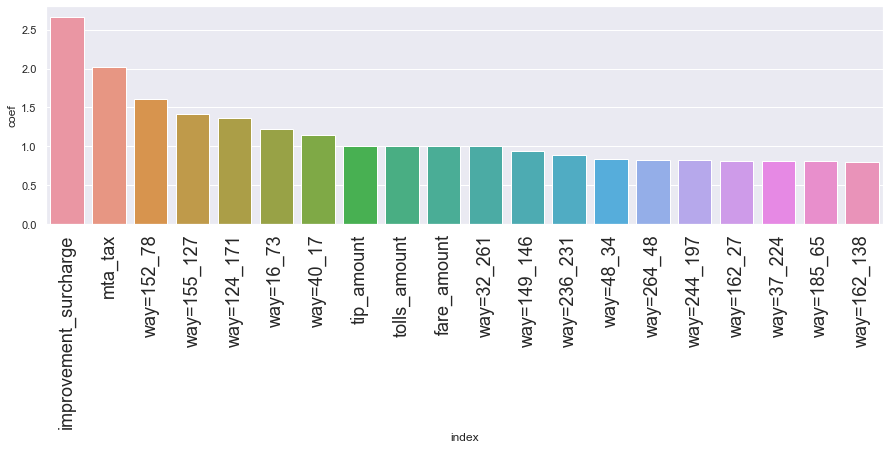

In [52]:
# посмотрим первые 20 признаков (признаки, сильнее всего способствующие росту цены)
sns.barplot(data=coef_df.iloc[:20,:].reset_index(), y='coef', x='index')
plt.xticks(rotation=90, fontsize=18)
plt.show()

In [53]:
# посмотрим, где находятся признаки congestion_surcharge и extra
coef_df.reset_index()[coef_df.reset_index()['index'].isin(['congestion_surcharge','extra'])]

,index,coef
42,extra,0.634676
52,congestion_surcharge,0.608081


Видно, что такие признаки как improvement_surcharge, mta_tax, tolls_amount, tip_amount, fare_amount, congestion_surcharge, extra оказывают наибольшее влияние на целевую переменную (чем больше признак, тем выше суммарная стоимость), что очевидно, поскольку итоговая цена получается из линейной комбинации этих признаков:
$\text{fare_amount} + \text{extra} + \text{mta_tax} + \text{improvement_surcharge} + \text{congestion_surcharge} = \text{tolls_amount} + \text{fare_amount} = \text{total_amount}$.
Проще говоря, суммарная стоимость складывается из суммы различных сборов за поедку (tolls_amount) + стоимость, посчитанная счетчиком (fare_amount).

Чтобы оценить влияние остальных факторов на итоговую стоимость, обучим только на них линейную регрессию

In [49]:
data_for_linear_reg = data_for_linear_reg.drop(['improvement_surcharge', 'mta_tax', 'tolls_amount',\
                                                            'tip_amount','fare_amount', 'congestion_surcharge',\
                                                            'extra'],axis=1)
sparse_learn_data = sparse.hstack([ohe_encode_features_sparse,\
                                   data_for_linear_reg.drop('total_amount',axis=1).to_numpy()]).tocsr()

### Оценим среднюю абсолютную ошибку модели (MAE) на отложенной выборке

In [55]:
X_train, X_test, y_train, y_test = train_test_split(sparse_learn_data,\
              data_for_linear_reg['total_amount'], test_size=0.3)

In [56]:
%%time
log_model = LinearRegression()
log_model.fit(X_train, y_train)

CPU times: user 31min 12s, sys: 3min 32s, total: 34min 44s
Wall time: 14min 30s


LinearRegression()

In [57]:
mean_absolute_error(log_model.predict(X_test), y_test)

3.075553197786683

Обучим на всех данных модель

In [58]:
%%time
log_model = LinearRegression()
log_model.fit(sparse_learn_data,\
              data_for_linear_reg['total_amount'])

CPU times: user 7min 25s, sys: 1min 5s, total: 8min 31s
Wall time: 4min 30s


LinearRegression()

In [59]:
coef_df = pd.DataFrame(log_model.coef_, index=np.hstack([ohe_encode_columns_sparse,\
                                                         data_for_linear_reg.drop('total_amount',axis=1).columns]),\
                       columns=['coef']).sort_values(by='coef', ascending=False)
coef_df.head()

,coef
way=256_177,51.315609
DOLocationID=116,44.570654
way=51_46,40.873800
DOLocationID=114,40.220827
way=17_232,38.951173


In [60]:
coef_df.shape

(44444, 1)

<AxesSubplot:ylabel='coef'>

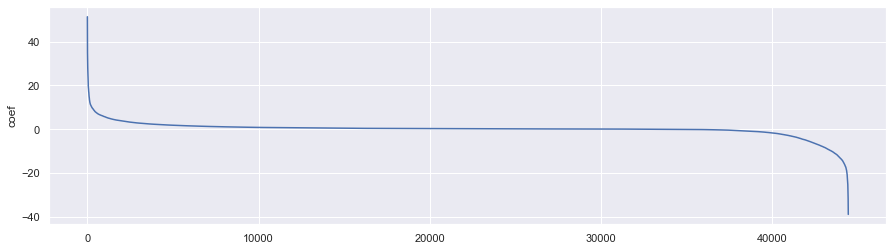

In [61]:
sns.lineplot(data=coef_df, y='coef', x=np.arange(coef_df.shape[0]))

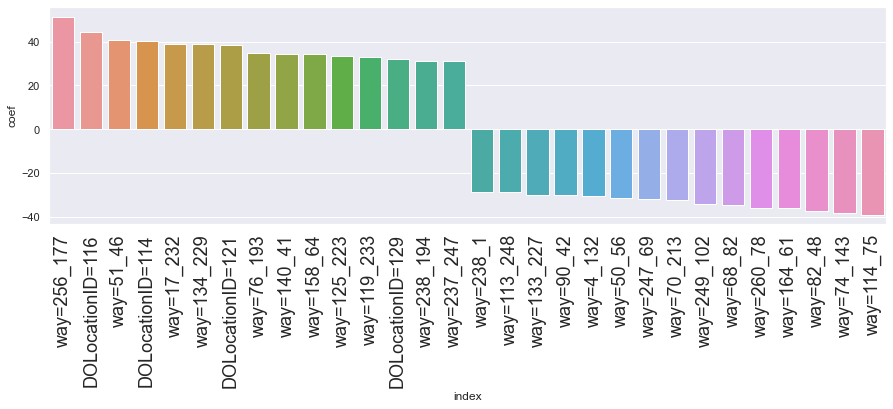

In [62]:
# посмотрим 30 наиболее влияющих факторов
sns.barplot(data=pd.concat([coef_df.iloc[:15,:].reset_index(),\
                            coef_df.iloc[-15:,:].reset_index()]), y='coef', x='index')
plt.xticks(rotation=90, fontsize=18)
plt.show()

Видим, что больше всего на стоимость оказывают влияние определенные маршруты и зоны, откуда забрали и привезли пассажиров, что неудивительно, поскольку маршрутов много и могут найтись такие маршруты, на которых чаще всего цена выходит высокой или низкой. Это может быть связано с различными факторами, например, на маршруте way=4428 часто бывают пробки из-за чего стоимость возрастает, или в зоне PULocation=0 бывает мало таксистов, поэтому спрос на них высокий -> цена повышается.

Использование таких признаков в модели для предсказания стоимости поездки должно зависеть от конкретной задачи:
- если мы хотим построить модель с хорошей обобщающей способностью, то есть не хотим привязываться к конкретному району, то эти признаки не стоит использовать, иначе модель переобучиться, подгонится под данные.
- напротив, если мы хотим научиться предсказывать стоимость поездки в конкретном районе, имеет смысл добавить в качестве признаков различные маршруты и зоны посадки/высадки пассажиров

Чтобы оценить влияние остальных факторов в обобщенном случае (без привязки к конкретному месту, области, городу), обучим линейную регрессию без признаков DOLocationID, way, PULocationID

In [50]:
data_for_linear_reg = picked_features_df.reset_index(drop=True)
encoder = OneHotEncoder()
new_ohe_encode_columns = ['VendorID', 'RatecodeID', 'payment_type','trip_type','store_and_fwd_flag','dropoff_date',
                         'pickup_date','taxi_type']
ohe_encode_features_sparse = encoder.fit_transform(picked_features_df[new_ohe_encode_columns])

# заводим список названий oheencoder признаков
ohe_encode_columns_sparse = []
for column in new_ohe_encode_columns:
    ohe_encode_columns_sparse.extend([column + '=' + str(i) for i in picked_features_df[column].unique()])

data_for_linear_reg.drop(ohe_encode_columns, axis=1, inplace=True)

data_for_linear_reg = data_for_linear_reg.drop(['improvement_surcharge', 'mta_tax', 'tolls_amount',\
                                                            'tip_amount','fare_amount', 'congestion_surcharge',\
                                                            'extra'],axis=1)

sparse_learn_data = sparse.hstack([ohe_encode_features_sparse,\
                                   data_for_linear_reg.drop('total_amount',axis=1).to_numpy()]).tocsr()



In [64]:
%%time
log_model = LinearRegression()
log_model.fit(sparse_learn_data,\
              data_for_linear_reg['total_amount'])

CPU times: user 59.9 s, sys: 19.9 s, total: 1min 19s
Wall time: 1min 5s


LinearRegression()

In [65]:
coef_df = pd.DataFrame(log_model.coef_, index=np.hstack([ohe_encode_columns_sparse,\
                                                         data_for_linear_reg.drop('total_amount',axis=1).columns]),\
                       columns=['coef']).sort_values(by='coef', ascending=False)
coef_df.head()

,coef
RatecodeID=5.0,23.649496
trip_type=1.0,23.072001
RatecodeID=4.0,17.409229
payment_type=2.0,7.078979
RatecodeID=3.0,5.038246


In [66]:
coef_df.shape

(154, 1)

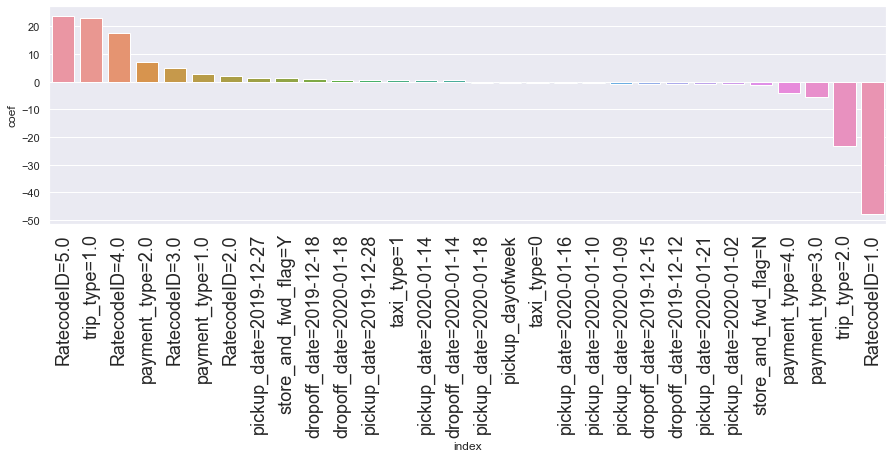

In [67]:
sns.barplot(data=pd.concat([coef_df.iloc[:15,:].reset_index(),\
                            coef_df.iloc[-15:,:].reset_index()]), y='coef', x='index')
plt.xticks(rotation=90, fontsize=18)
plt.show()

### RatecodeID

Из представленной диаграммы видно, что наибольшее влияние на стоимость поездки оказывает тариф поездки (RatecodeID). Причем фактор поездки по обычному тарифу (RatecodeID=1) свидетельствует о низкой стоимости поездки, напротив, поездки из аэропорта (RatecodeID=2), Нью-Джерси(RatecodeID=3) и Багамских островов/Westchester(RatecodeId=4) предполагают, что стоимость поездки будет высокая (из аэропорта выше всего). Действительно, в повседневной жизни поездки из аэропорта обходятся значительно дороже, чем обычные поездки.

Фактор договорной цены RatecodeID=5 говорит о том, что поездка скорее всего будет стоить дороже обычного.

### trip_type

Также, интересным наблюдением является то, что вызов такси с улицы(trip_type=1) менее выгоден нежели вызов такси по телефону/приложению(trip_type=2). При вызове такси с улицы повышается вероятность заплатить выше средней стоимости, а по телефону, наоборот, ниже средней стоимости.

### payment_type

Небольшое влиянение на стоимость поездки оказывает способ оплаты(payment_type), а именно, стоимость поездки, оплаченной картой(payment_type=1) в среднем больше обычной. А фактор payment_type=3 (бесплатная поездка) свидетельствует о том, что в этом случае стоимости поездки в среднем меньше обычной (что логично: 0 < total_amount).

Остальные же факторы оказывают незначительное влияние на модель

# 2) Найдите аномальные поездки. Почему именно эти поездки вы считаете аномальными?

Аномалиями будем считать выбросы, то есть поездки, значения признаков которых сильно отличаются от большинства.

Посмотрим на аномальные значения количественных признаков с помощью boxplot

In [68]:
numerical_features = ['passenger_count','trip_distance','fare_amount','tip_amount','total_amount','trip_time']

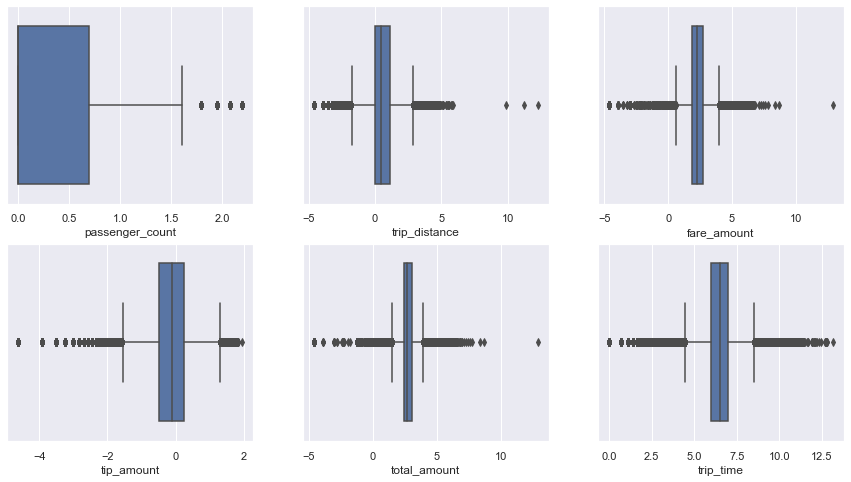

In [69]:
fig, ax = plt.subplots(2,3,figsize=(15,8))
i = 0
for feature in numerical_features:
    if feature == 'tip_amount':
        sns.boxplot(np.log(np.log(picked_features_df[feature])), ax=ax[i // 3][i % 3])
    else:
        sns.boxplot(np.log(picked_features_df[feature]), ax=ax[i // 3][i % 3])
    i += 1

На графиках boxplot отдельными точками представлены аномалии (в логарифмических шкалах). Они соответствуют значениям, не входящим в промежуток: $[Q1 - 1.5 * IQR; Q3 + 1.5 * IQR]$, где
- Q1 - первый квартиль
- Q3 - третий квартиль
- IQR - интерквартильный размах

В качестве примера приведем поездку, общая стоимость которой больше 300000 долларов

In [70]:
picked_features_df[picked_features_df['total_amount'] > 300000].T

,3812021
VendorID,1.0
passenger_count,1.0
trip_distance,0.0
RatecodeID,1.0
store_and_fwd_flag,Y
PULocationID,236
DOLocationID,237
payment_type,4.0
fare_amount,398468.38
extra,2.5


Видим, что пассажир не проехал ни сколько (trip_distance = 0) и тем не менее счетчик (fare_amount) намотал 398471,2 долларов, что невозможно, из-за чего клиент отказался платить (payment_type=4 - Dispute)

Аномалии сразу по многим факторам можно выявлять методами машинного обучения такими как, к примеру, IsolationForest, OneClassSVM. Однако, поскольку данных много, обучить их сразу на всех не получится.

# 3) Постройте распределение по стоимости поездок. Проверьте гипотезу о том, что оно имеет нормальное распределение. Как вы можете это объяснить?

<AxesSubplot:ylabel='Density'>

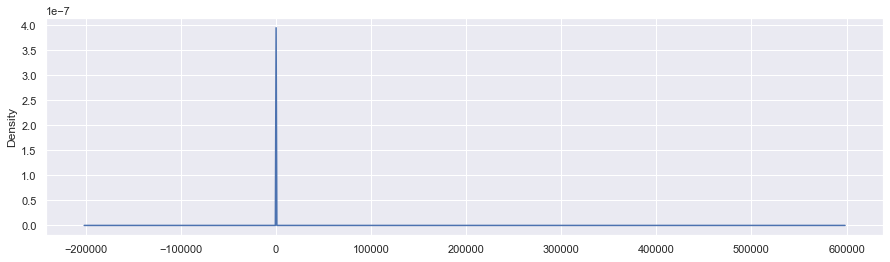

In [71]:
picked_features_df['total_amount'].plot(kind='density')

In [72]:
Q1 = np.quantile(picked_features_df['total_amount'], q=0.25)
Q3 = np.quantile(picked_features_df['total_amount'], q=0.75)
IQR = Q3 - Q1
left = Q1 - 1.5 * IQR
right = Q3 + 1.5 * IQR

total_amount_df = picked_features_df[(picked_features_df['total_amount'] < right) &\
                                     (picked_features_df['total_amount'] > left)]['total_amount']

<AxesSubplot:ylabel='Density'>

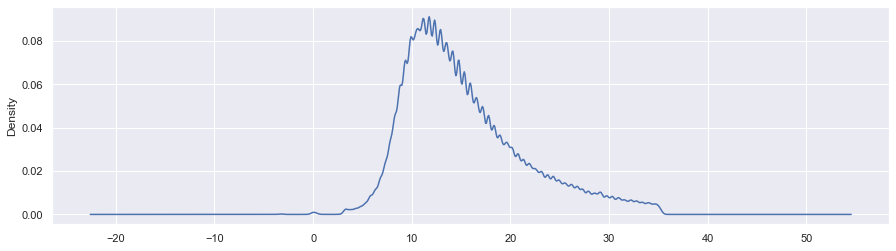

In [73]:
# уберем выбросы и посмотрим на распределение без них
total_amount_df.plot(kind='density')

Видим, что распределение ассиметрично.

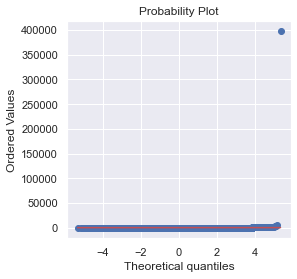

In [74]:
# построим qq-plot
fig, ax = plt.subplots(figsize=(4,4))
stats.probplot(picked_features_df['total_amount'], dist="norm", plot=ax)
plt.show()

Очевидно, что распределение не нормальное, применим тест Shapiro-Wilk: за нулевую гипотезу H0 берем, что данная выборка взята из генеральной совокупности, распределение которой нормальное.

In [75]:
stats.shapiro(picked_features_df['total_amount'])

ShapiroResult(statistic=0.013708651065826416, pvalue=0.0)

Получаем, что вероятность получить такие и еще более значимые различия с ГС равна 0%, т.е. нулевая гипотеза отвергается, поездки распределены не нормально.

Попробуем сгладить стоимость применением преобразования Бокса-Кокса

In [76]:
picked_features_df['total_amount'].min()

-1472.8

In [77]:
total_amount_df = stats.boxcox(1474 + picked_features_df['total_amount'])[0]

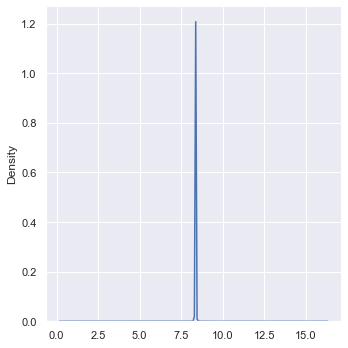

In [78]:
sns.displot(total_amount_df, kind='kde')

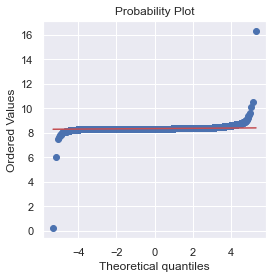

In [79]:
fig, ax = plt.subplots(figsize=(4,4))
stats.probplot(total_amount_df, dist="norm", plot=ax)
plt.show()

In [80]:
stats.shapiro(total_amount_df)

ShapiroResult(statistic=0.0019497275352478027, pvalue=0.0)

Не успешно

# 4) Из данных постройте модель, которая описывает тариф (т.е. стоимость поездки от других факторов).
# 5) Используя модель из пункта выше ответьте на вопрос: были ли в какие-то дни (или временные промежутки) скидки или акции? И если то были, то как вы можете это объяснить.

Используя в 1 пункте последнюю линейную модель без привязки к конкретному месту (без признаков DOLocationID, way, PULocationID), видно, что каких-то скидок или акций в конкретные дни для всех не было, иначе бы признаки pickup_date=... и dropoff_date=... имели бы большой коэффициент при линейной регрессии

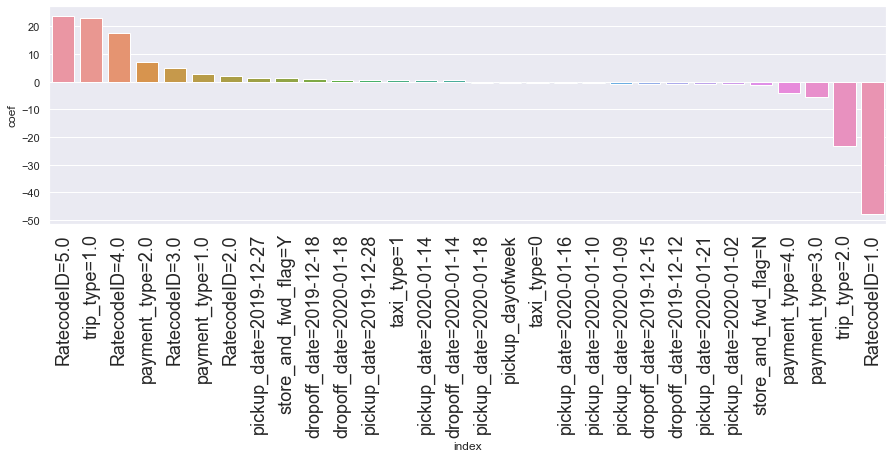

In [81]:
sns.barplot(data=pd.concat([coef_df.iloc[:15,:].reset_index(),\
                            coef_df.iloc[-15:,:].reset_index()]), y='coef', x='index')
plt.xticks(rotation=90, fontsize=18)
plt.show()

Посмотрим, какие коэффициенты вида pickup_date=$datetime$ и dropoff_datetime=$datetime$ оказывают отрицательное влияние на стоимость (при наличии данного фактора цена падает)

In [82]:
coef_df = coef_df.reset_index()

In [106]:
# отберем 10 значащих дат
pickup_date_df = coef_df[coef_df['index'].str.startswith('pickup_date=')].sort_values(by='coef', ascending=False)
pickup_date_main_df = pickup_date_df.iloc[-10:,:]
pickup_date_main_df

,index,coef
133,pickup_date=2019-12-02,-0.427601
136,pickup_date=2020-01-04,-0.472962
137,pickup_date=2019-12-06,-0.512227
138,pickup_date=2019-12-08,-0.517357
139,pickup_date=2020-01-18,-0.525293
142,pickup_date=2020-01-16,-0.677534
143,pickup_date=2020-01-10,-0.681682
144,pickup_date=2020-01-09,-0.713363
147,pickup_date=2020-01-21,-0.879028
148,pickup_date=2020-01-02,-0.980328


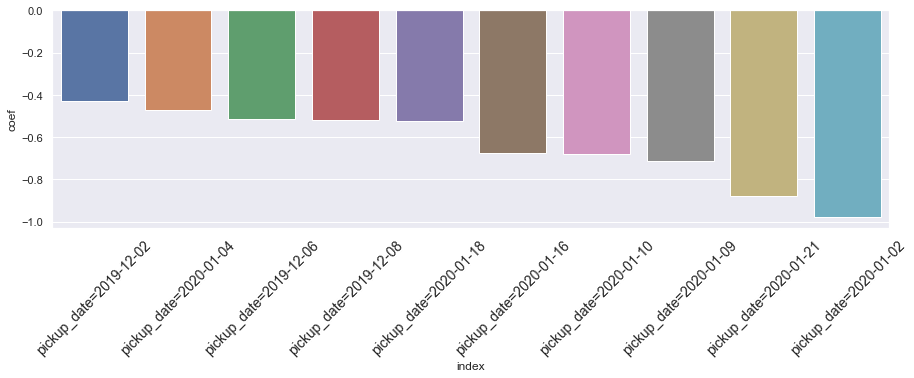

In [107]:
fig, ax = plt.subplots(figsize=(15,4))
sns.barplot(data=pickup_date_main_df, y='coef', x='index')
plt.xticks(rotation=45, fontsize=14)
plt.show()

In [109]:
# посмотрим, что за поездки были 2 января 2020 года
ja_2_df = picked_features_df[picked_features_df['pickup_date'].astype(str)=='2020-01-02']
ja_2_df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,pickup_year,dropoff_year,pickup_month,dropoff_month,pickup_dayofweek,dropoff_dayofweek,pickup_hour,dropoff_hour,trip_time,way
2729062,2.0,1.0,1.69,1.0,N,161,234,1.0,11.5,0.0,...,2020,2020,1,1,3,3,3,3,994.0,161_234
2742172,2.0,1.0,0.81,1.0,N,234,68,1.0,6.0,0.0,...,2020,2020,1,1,3,3,4,4,366.0,234_68
2742173,2.0,1.0,1.37,1.0,N,68,230,1.0,15.5,0.0,...,2020,2020,1,1,3,3,4,11,26805.0,68_230
2809988,2.0,1.0,0.97,1.0,N,107,90,1.0,6.5,1.0,...,2020,2020,1,1,3,3,9,9,469.0,107_90
2809989,2.0,1.0,0.78,1.0,N,186,100,2.0,7.5,1.0,...,2020,2020,1,1,3,3,9,9,600.0,186_100


In [130]:
def compare_total_amount_in_2_dfs_by_col(df1, df1_name, df2, df2_name, col_compare, estimator):
    grouped_df1 = df1.groupby(by=col_compare)['total_amount'].median().reset_index()
    grouped_df1['hue'] = df1_name
    grouped_df2 = df2.groupby(by=col_compare)['total_amount'].median().reset_index()
    grouped_df2['hue'] = df2_name
    return pd.concat([grouped_df1, grouped_df2], axis=0)

<AxesSubplot:xlabel='payment_type', ylabel='total_amount'>

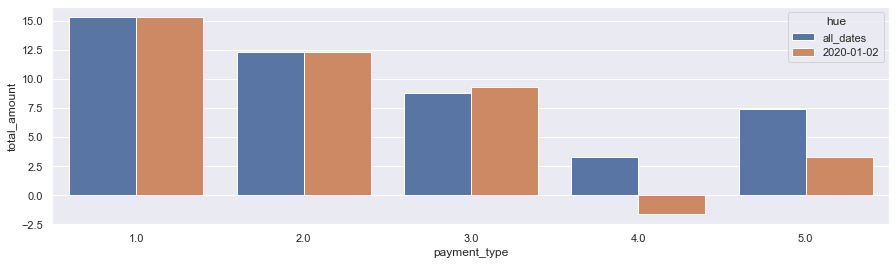

In [137]:
# при оплате картой или наличными больших различий в стоимости поездки по всем датам нет
compare_df = compare_total_amount_in_2_dfs_by_col(picked_features_df, 'all_dates', ja_2_df, '2020-01-02',
                                               'payment_type', np.median)
sns.barplot(data=compare_df, x='payment_type', y='total_amount', hue='hue')

<AxesSubplot:xlabel='RatecodeID', ylabel='total_amount'>

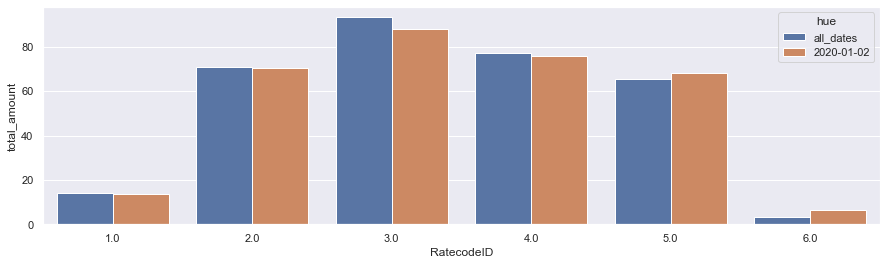

In [138]:
# в разрезе по тарифам (RatecodeID) также не наблюдается больших различий в стоимости поездки по всем датам
compare_df = compare_total_amount_in_2_dfs_by_col(picked_features_df, 'all_dates', ja_2_df, '2020-01-02',
                                               'RatecodeID', np.median)
sns.barplot(data=compare_df, x='RatecodeID', y='total_amount', hue='hue')